# Limitaciones en LLM

Este ejercicio es **opcional (no influye en la calificación).**

**Recordatorio:** si bien en este trabajo no hay nada de LLMs los conceptos aprendidos serán necesarios para aprender sobre LLMs: redes neuronales y cómo implementarlas, y nociones básicas de NLP basado en Deep Learning.

En el próximo trabajo sí trabajaremos con el uso de LLMs. Una aplicación muy común de LLM es [ChatGPT](https://chatgpt.com/). El chat es realmente útil a la hora de, por ejemplo programar. Parte de las soluciones que están en este trabajo fueron realizadas usando ChatGPT para programar.

Una caso ejemplo de cuándo he usado el ChatGPT para ahorrarme escribir código ha sido en el [TP1_ImageRegression](https://github.com/mariano22/llm-austral/blob/main/TP1/solutions/TP1_ImageRegression.ipynb). En el mismo teníamos imágenes y posiciones de la cabeza de una persona que aparece en dicha imágen. Y teníamos que aplicar sucesivamente las siguientes transformaciones:
- Cambiar de tamaño a 224 la dimensión más chica (y la más grande según el ratio correspondiente de modo que no haya deformación).
- Recortar a un cuadrado de (224,224) alrededor de la cabeza. Notar que afectar la X (variable independiente) teniendo en cuenta la y (variable dependiente) no es metodológicamente correcto: ya que no contaremos con la y en tiempo de inferencia. Por eso es importante no hacer demasiada trampa: recortaremos la imagen de modo que la cabeza quede dentro del recorte, pero en una posición aleatoria NO en el centro (esto último es muy importante porque sino el modelo va a aprender a predecir el centro).

In [12]:
import pandas as pd
import os.path
import torch
from PIL import Image
from torchvision import transforms
from matplotlib import pyplot as plt



CSV_PATH = '../data/mpii/mpii_dataset.csv'
IMAGE_DIR_PATH = '../data/mpii/images/'

def load_data():
    df = pd.read_csv(CSV_PATH)
    df=df.rename(columns={'NAME':'filename'})
    df['head_x'] = (df['head top_X']+df['upper neck_X']) / 2
    df['head_y'] = (df['head top_Y']+df['upper neck_Y']) / 2
    df = df[['filename', 'head_x', 'head_y']]
    df = df.sample(frac=1)
    return df

df = load_data()
df

,filename,head_x,head_y
8964,055804898.jpg,290.0,114.0
9522,015134126.jpg,764.5,282.5
1862,091748584.jpg,610.0,73.5
4589,010184727.jpg,231.5,97.0
14254,067665830.jpg,659.0,134.0
...,...,...,...
9559,099552023.jpg,1088.5,221.0
17165,080880111.jpg,639.5,299.0
15593,057830665.jpg,373.0,101.5
7033,042744192.jpg,428.5,239.0


#### Ejercicio D.1: "Transformación en las targets"

Se ha escrito el código que carga los datos, calcula la posición de la cabeza y carga una imágen y la transforma en tensor.
Hay que completar le función resize_x_and_y, de modo que devuelve un x de shape \[3, 224, 224\], de acuerdo a las transformaciones que se explicaron más arriba, y que al mismo tiempo calcule un nuevo y tal que sea la posición de la cabeza en la nueva imagen. Para chequear esto usar las función show_sample que muestra la imagen junto a una cruz en la cabeza.

torch.Size([3, 480, 720]) torch.Size([2])


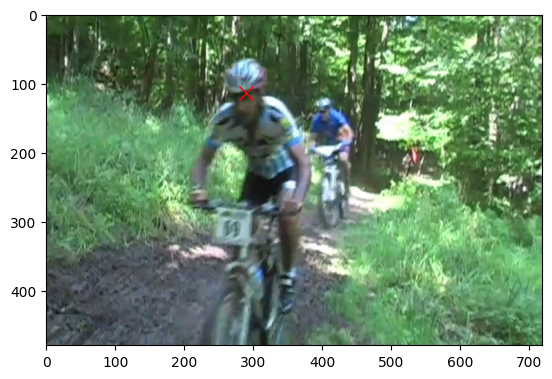

In [13]:
def get_sample(df, idx):
    row = df.iloc[idx]
    img_path = os.path.join(IMAGE_DIR_PATH, row['filename'])
    head = torch.tensor([row['head_x'],row['head_y']], dtype=torch.float)
    img = Image.open(img_path)
    return transforms.functional.pil_to_tensor(img), head

def show_sample(p):
    x,y = p
    plt.imshow(  x.permute(1, 2, 0)  )    
    plt.plot(y[0], y[1], "xr", markersize=10)

def resize_x_and_y(x,y):
    # TODO: hacer la transformación de x acá, obteniendo un new_x. 
    # También debemos generar un new_y que apunte a la cabeza en la nueva imágen new_x.
    new_x = x
    new_y = y
    return new_x, new_y



x,y=get_sample(df,0)
x,y=resize_x_and_y(x,y)
print(x.shape, y.shape)
show_sample((x,y))

#### Ejercicio D.2: " en las targets"

La idea es resolver un problema de estructuras de datos sencillo y asistirse con el GPT. Este tipo de problemas puede parecer medio "de juguete" pero nos encontramos usualmente haciendo este tipo de razonamientos lógicos a la hora de programar, todo el tiempo (como pasó con el problema anterior, donde las transformaciones para obtener new_y eran no triviales).

El problema pueden encontrarlo en el siguiente [link](https://codeforces.com/contest/1971/problem/D)

El problema les cuenta que les dan una secuencia $nums$ de $0$'s y $1$'s, y pueden cortarla en $K$ subcadenas (una subcadena es un conjunto **consecutivo** o de caracteres). Luego, pueden re-ordenar esas subcadenas. 

El objetivo es obtener una secuencia de $0$'s y $1$'s dónde los $0$'s estén al principio, y luego estén los $1$'s. 

Notar que siempre podemos hacerlo, cortando la secuencia en todos caracteres independientes y al re-ordenar, poner los $0$'s primeros, y luego los $1$'s (en este caso $K = len(nums)$). El problema pide encontrar el mínimo $K$ tal que se puede lograr el objetivo.

Por ejemplo si tenemos:
$$11010$$
La respuesta es $3$ ya que podemos cortar en las secuencias $11$, $01$ y $0$ y re-ordenar las mismas (llevándo la última hacia el principio y la primera al final tal como muestra la imágen), de modo de lograr el objetivo:

![title](codeforces.png)

**Nota:** La idea es que pueden usar ChatGPT o cualquier otro asistente como Copilot para resolver el problema. La idea es que lo resuelvan, cuenten si usaron o trataron de usar algún asistente de IA, y detallen cómo lo usaron y cuál fue su experiencia.


In [16]:
small_tests = [
    ('11010', 1),
    ('00000000', 1),
    ('1', 1),
    ('10', 2),
    ('0001111', 1),
    ('0110', 2),
]

In [19]:
def solve(nums):
    # TODO: solve the exercise here
    return len(nums)

for test_input, test_answer in small_tests:
    output = solve(test_input)
    if output != test_answer:
        print(f"Error for the case nums={test_input}")
        print(f"Expected answer: {test_answer} but got this output: {output}")
        print()

Error for the case nums=11010
Expected answer: 1 but got this output: 5

Error for the case nums=00000000
Expected answer: 1 but got this output: 8

Error for the case nums=0001111
Expected answer: 1 but got this output: 7

Error for the case nums=0110
Expected answer: 2 but got this output: 4



Codeforces es un Juez Online que utilizamos para practicar para las competencias de programación que yo había participado y soy coach de UNR y UTN. 

Si se crean una cuenta van a poder submitear (enviar) su solución en el lenguaje que quieran y se la va a corregir automáticamente (va a ejecutarla en una serie de casos para los cuales se conoce la salida y va a comparar la salida del programa con la salida esperada).

**Yo para correjir el ejercicio voy a submitearlo en codeforces, si da aceptado, el ejercicio está bien. Sino, está mal.**